In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#path_file = "./output/mnist/acc/noniid/L10E2/"
path_file = "./output/mnist/acc/noniid/L20E5/"

fl_path_file = "./output/mnist/acc/FL/"


In [2]:
#reading files
#metisp1_files = [
#    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.10.weight.pth.acc.csv",
#    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.20.weight.pth.acc.csv",
#    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv"
#]
#rnd_files = [
#    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
#    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part20_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
#    "eFL_MLP2lr0.01_dc1.0_B10_L10_E2_G3000_avg10z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
#]

metisp1_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.10.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.20.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_g_nw_d_minkowski_p1.0_MLP2_G10_partition_noniid90_nclient300.npy.part.30.weight.pth.acc.csv"
]

rnd_files = [
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part10_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part20_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "eFL_MLP2lr0.01_dc1.0_B10_L20_E5_G5000_avg10z_rnd_num_client300.part30_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
    
]
fl_files = [
    "FL_MLP2lr0.01_dc1.0_B10_L10_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "FL_MLP2lr0.01_dc1.0_B10_L20_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "FL_MLP2lr0.01_dc1.0_B10_L50_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv",
    "FL_MLP2lr0.01_dc1.0_B10_L100_G5000_partition_noniid90_nclient300.npy.weight.pth.acc.csv"
]

metisp1_dfs = []

n_metisp1_files = len(metisp1_files)
for i in range(n_metisp1_files):
    metisp1_dfs.append(pd.read_csv(path_file + metisp1_files[i]))

rnd_dfs = []

n_rnd_files = len(rnd_files)
for i in range(n_rnd_files):
    rnd_dfs.append(pd.read_csv(path_file + rnd_files[i]))

fl_dfs = []
fl_n_files = len(fl_files)
for i in range(fl_n_files):
    fl_dfs.append(pd.read_csv(fl_path_file + fl_files[i]))


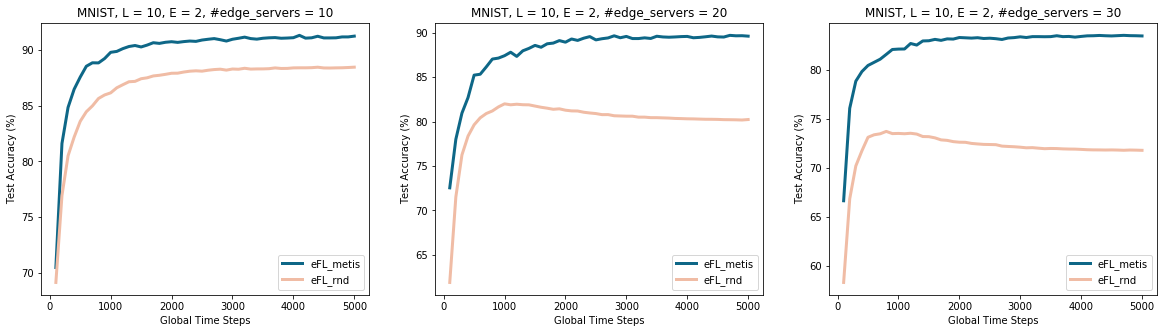

In [3]:
#plot
line_color = ["#0e6787", "#ad85ab", "#f0bca5"]
lbl_metisp1_cluster = ["eFL_metis: #edge_servers = 10", "eFL_metis: #edge_servers = 20", "eFL_metis: #edge_servers = 30"]
lbl_rnd_cluster = ["eFL_rnd: #edge_servers = 10", "eFL_rnd: #edge_servers = 20", "eFL_rnd: #edge_servers = 30"]
lbl_cluster = ["#edge_servers = 10", "#edge_servers = 20", "#edge_servers = 30"]
fig, ax = plt.subplots(1, 3, figsize=(20,5))

for i in range(n_metisp1_files):
    l1, = ax[i].plot(metisp1_dfs[i].global_round, metisp1_dfs[i].test_acc, label = "eFL_metis", c = line_color[0], linewidth=3)
    l2, = ax[i].plot(rnd_dfs[i].global_round, rnd_dfs[i].test_acc, label = "eFL_rnd", c = line_color[2], linewidth = 3) #, linestyle = '-.'

    ax[i].set_title("MNIST, L = 10, E = 2, " + lbl_cluster[i])
    ax[i].set_ylabel("Test Accuracy (%)")
    ax[i].set_xlabel("Global Time Steps")
    ax[i].legend([l1, l2], ["eFL_metis", "eFL_rnd"], loc='best')


plt.show()

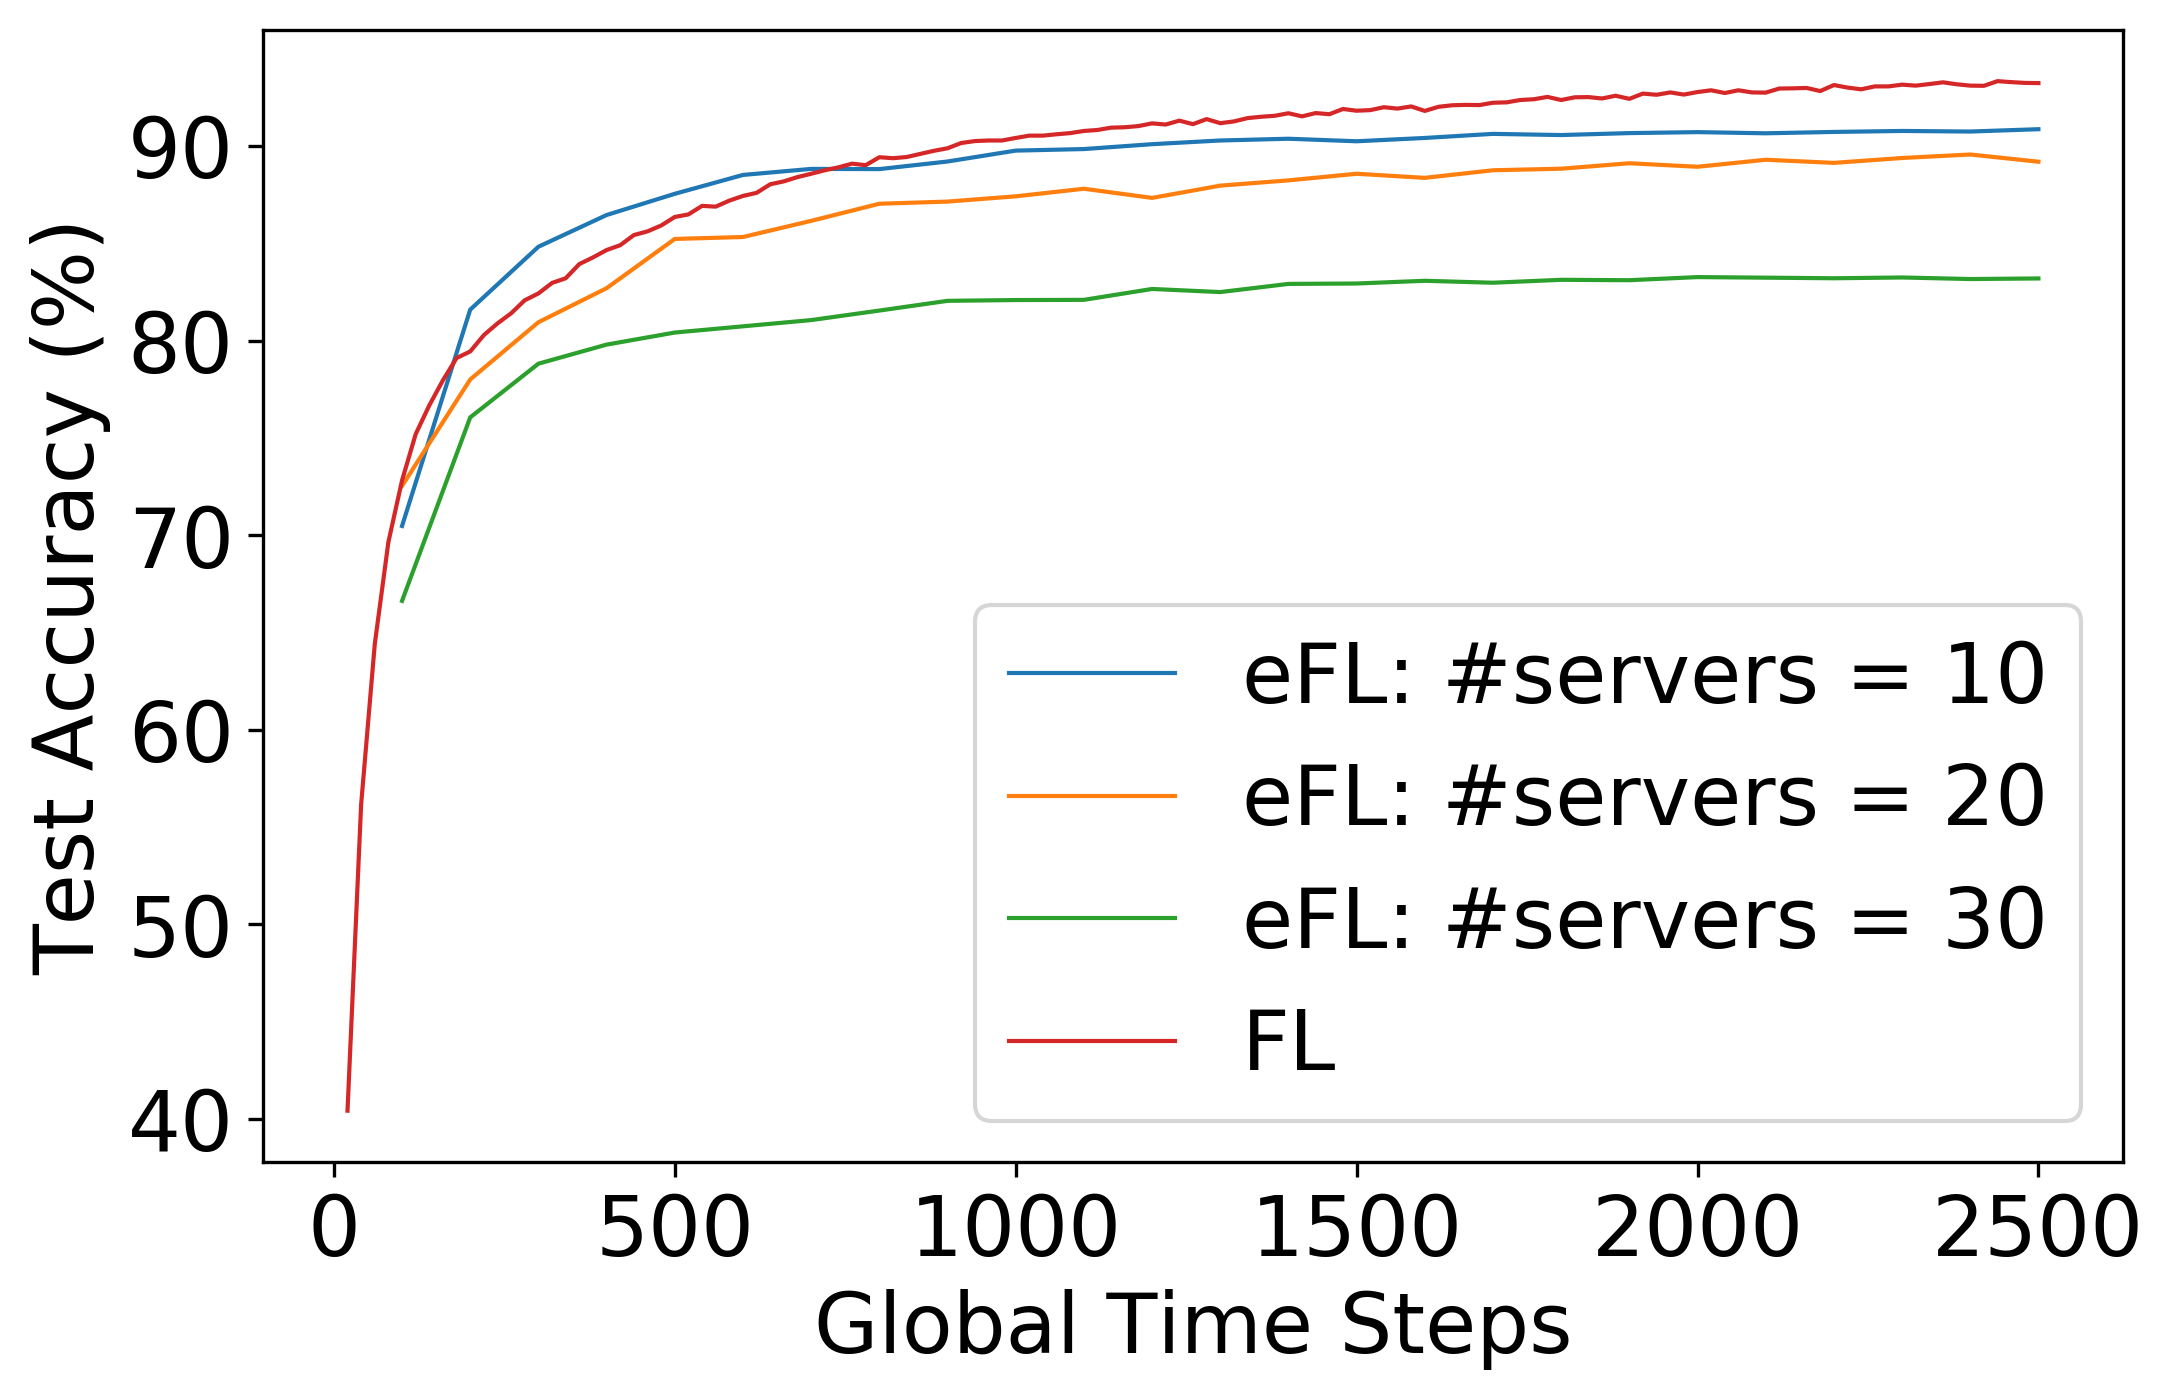

In [6]:
#plot

fontsize = 20
line_color = ["#0e6787", "#ad85ab", "#f0bca5"]
lbl_metisp1_cluster = ["eFL_metis: #servers = 10", "eFL_metis: #servers = 20", "eFL_metis: #servers = 30"]
lbl_rnd_cluster = ["eFL_rnd: #edge_servers = 10", "eFL_rnd: #edge_servers = 20", "eFL_rnd: #edge_servers = 30"]
fl_lbl = ['FL_L10', 'FL_L20', 'FL_L50', 'FL_L100']


lbl_metisp1_cluster = ["eFL: #servers = 10", "eFL: #servers = 20", "eFL: #servers = 30"]
lbl_rnd_cluster = ["eFL_rnd: #edge_servers = 10", "eFL_rnd: #edge_servers = 20", "eFL_rnd: #edge_servers = 30"]
fl_lbl = ['FL', 'FL', 'FL', 'FL']

fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(300)
global_time_steps_to_cut = 2500


for i in range(n_metisp1_files):
    to_plot = metisp1_dfs[i][metisp1_dfs[i].global_round <= global_time_steps_to_cut] 
    ax.plot(to_plot.global_round, to_plot.test_acc, label = lbl_metisp1_cluster[i], linewidth=1)
    #ax.plot(metisp1_dfs[i].global_round, metisp1_dfs[i].test_acc, label = lbl_metisp1_cluster[i], linewidth=3)

for i in range(1, fl_n_files-2):
    to_plot = fl_dfs[i][fl_dfs[i].global_round <= global_time_steps_to_cut] 
    ax.plot(to_plot.global_round, to_plot.test_acc, label = fl_lbl[i], linewidth=1)
#for i in range(fl_n_files-3):
#    to_plot = fl_dfs[i][fl_dfs[i].global_round <= global_time_steps_to_cut] 
#    ax.plot(to_plot.global_round, to_plot.test_acc, label = fl_lbl[i], linewidth=3)

    #ax.plot(fl_dfs[i].global_round, fl_dfs[i].test_acc, label = fl_lbl[i], linewidth=3)

#for i in range(n_rnd_files):
#    ax.plot(rnd_dfs[i].global_round, rnd_dfs[i].test_acc, label = lbl_rnd_cluster[i], c = line_color[i], linewidth = 3, ls = '-.')

#ax.set_title("MNIST: non-IID, L = 20, E = 5, FL vs. eFL", size = 12)
ax.set_ylabel("Test Accuracy (%)", size =fontsize)
ax.set_xlabel("Global Time Steps", size =fontsize)
ax.legend(loc='best', fontsize = fontsize) #fontsize=12

#ax.set_title("CIFAR10: noniid, L=20, E=5", size=18)
#ax.set_ylabel("Test Accuracy (%)", size=15)
#ax.set_xlabel("Global Time Steps", size=15)
#ax.legend(loc='best', fontsize =15)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)

plt.show()
